# 📦 Customer Churn Analysis (Telco Dataset)

This project analyzes customer churn patterns using data from a fictional telecom company. It aims to identify which customer segments are most at risk of churning and recommend strategies to improve retention.

🔍 **Objective:**
- Identify churn trends by contract, tenure, internet service
- Build data storytelling and business insight skills


In [1]:
library(tidyverse)
library(janitor)

# Load the data
churn_data <- read_csv("/kaggle/input/customer-churn-analysis-in-r/WA_Fn-UseC_-Telco-Customer-Churn.csv") %>%
  clean_names()

# Preview
glimpse(churn_data)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Rows: 7043 Columns: 21


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): customerID, gender, Partner, Dependents, PhoneService, MultipleLin...
dbl  (4): SeniorCitizen, tenure, MonthlyCharges, TotalCharges



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 7,043
Columns: 21
$ customer_id       <chr> "7590-VHVEG", "5575-GNVDE", "3668-QPYBK", "7795-CFOC…
$ gender            <chr> "Female", "Male", "Male", "Male", "Female", "Female"…
$ senior_citizen    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ partner           <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "Ye…
$ dependents        <chr> "No", "No", "No", "No", "No", "No", "Yes", "No", "No…
$ tenure            <dbl> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, …
$ phone_service     <chr> "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No",…
$ multiple_lines    <chr> "No phone service", "No", "No", "No phone service", …
$ internet_service  <chr> "DSL", "DSL", "DSL", "DSL", "Fiber optic", "Fiber op…
$ online_security   <chr> "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes", …
$ online_backup     <chr> "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "…
$ device_protection <chr> "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "…
$ tech_support  

In [2]:
# Check for NA values
colSums(is.na(churn_data))

# Some 'total_charges' values are blank — fix and convert it to numeric
churn_data <- churn_data %>%
  filter(total_charges != " ") %>%
  mutate(
    total_charges = as.numeric(total_charges),
    churn = as.factor(churn)
  )


customer_id            gender    senior_citizen           partner 
                0                 0                 0                 0 
       dependents            tenure     phone_service    multiple_lines 
                0                 0                 0                 0 
 internet_service   online_security     online_backup device_protection 
                0                 0                 0                 0 
     tech_support      streaming_tv  streaming_movies          contract 
                0                 0                 0                 0 
paperless_billing    payment_method   monthly_charges     total_charges 
                0                 0                 0                11 
            churn 
                0

In [3]:
glimpse(churn_data)
summary(churn_data$total_charges)


Rows: 7,032
Columns: 21
$ customer_id       <chr> "7590-VHVEG", "5575-GNVDE", "3668-QPYBK", "7795-CFOC…
$ gender            <chr> "Female", "Male", "Male", "Male", "Female", "Female"…
$ senior_citizen    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ partner           <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "Ye…
$ dependents        <chr> "No", "No", "No", "No", "No", "No", "Yes", "No", "No…
$ tenure            <dbl> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49, …
$ phone_service     <chr> "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No",…
$ multiple_lines    <chr> "No phone service", "No", "No", "No phone service", …
$ internet_service  <chr> "DSL", "DSL", "DSL", "DSL", "Fiber optic", "Fiber op…
$ online_security   <chr> "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes", …
$ online_backup     <chr> "Yes", "No", "Yes", "No", "No", "No", "Yes", "No", "…
$ device_protection <chr> "No", "Yes", "No", "Yes", "No", "Yes", "No", "No", "…
$ tech_support  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   18.8   401.4  1397.5  2283.3  3794.7  8684.8 

`summarise()` has grouped output by 'contract'. You can override using the
`.groups` argument.


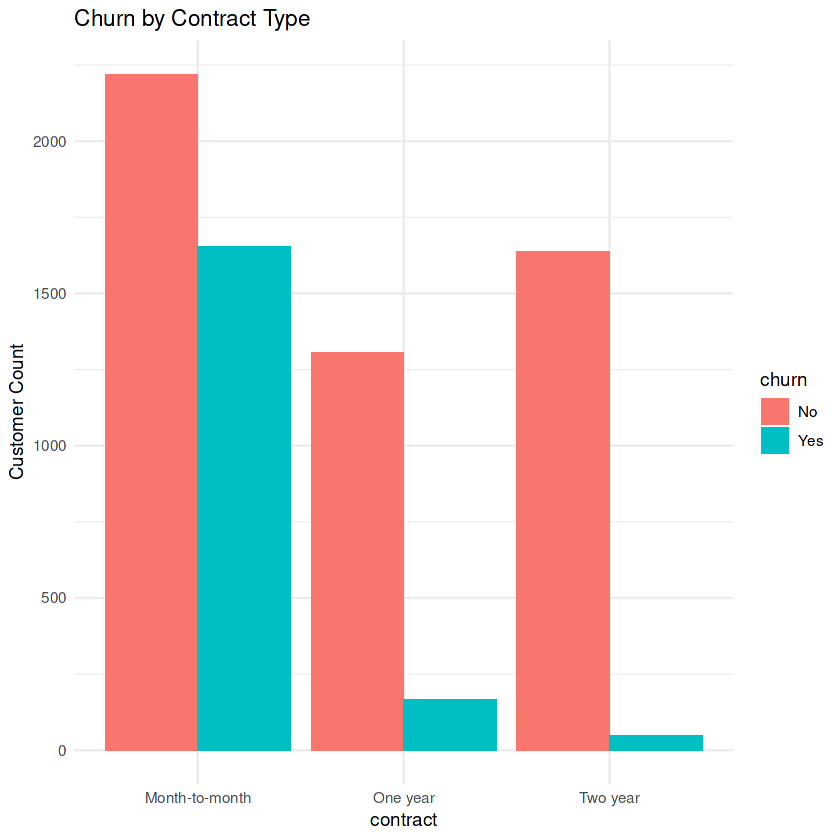

In [4]:
churn_data %>%
  group_by(contract, churn) %>%
  summarise(customers = n()) %>%
  ggplot(aes(x = contract, y = customers, fill = churn)) +
  geom_col(position = "dodge") +
  labs(title = "Churn by Contract Type", y = "Customer Count") +
  theme_minimal()


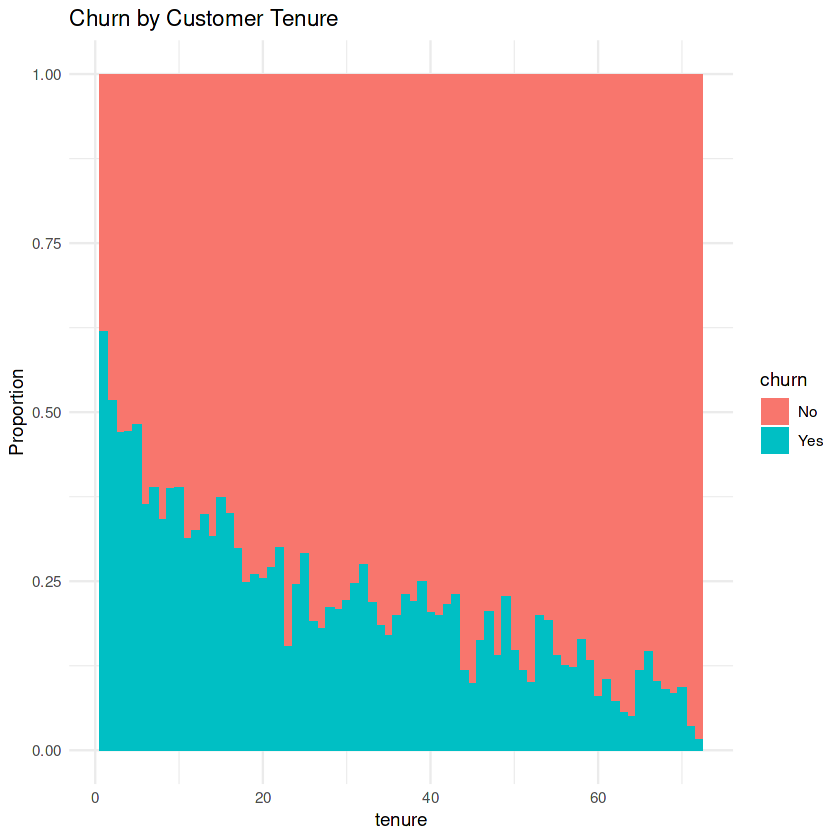

In [5]:
churn_data %>%
  ggplot(aes(x = tenure, fill = churn)) +
  geom_histogram(binwidth = 1, position = "fill") +
  labs(title = "Churn by Customer Tenure", y = "Proportion") +
  theme_minimal()


`summarise()` has grouped output by 'internet_service'. You can override using
the `.groups` argument.


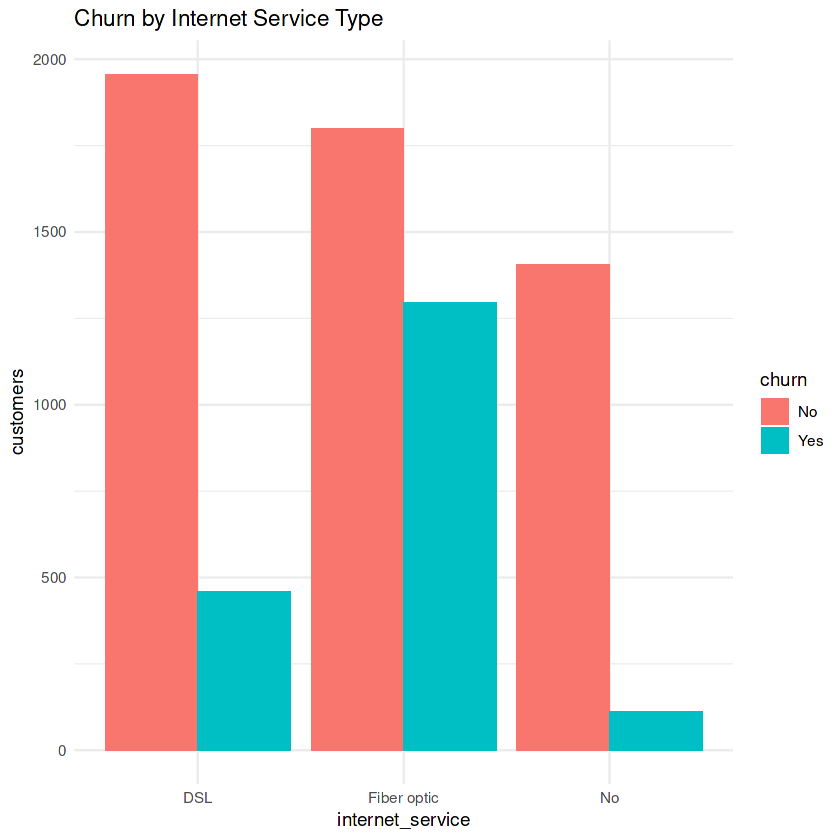

In [6]:
churn_data %>%
  group_by(internet_service, churn) %>%
  summarise(customers = n()) %>%
  ggplot(aes(x = internet_service, y = customers, fill = churn)) +
  geom_col(position = "dodge") +
  labs(title = "Churn by Internet Service Type") +
  theme_minimal()


# 📊 Key Insights from Customer Churn Analysis

✅ **Contract Type:**
- Month-to-month customers are much more likely to churn.
- Long-term contracts (1- or 2-year) reduce churn risk.

✅ **Customer Tenure:**
- New customers (tenure < 6 months) are far more likely to churn.
- Longer-tenure customers are more loyal.

✅ **Internet Service:**
- Customers with fiber optic internet show higher churn than those with DSL or no internet.

🎯 **Recommendations:**
- Introduce retention offers during the first 6 months of a customer’s lifecycle.
- Encourage customers to switch from month-to-month to longer-term contracts with discounts.
- Investigate fiber optic service complaints to reduce churn.

